In [1]:
import numpy as np
import torch

# Generate training data
# Create 10000 equally spaced points between -2π and 2π
x_train = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
# Calculate the sine of the input values
y_train = np.sin(x_train)
# Convert numpy arrays to PyTorch tensors and reshape them to be used in the model
x_train, y_train = torch.tensor(x_train, dtype=torch.float32).view(-1, 1), torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Generate test data
x_test = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y_test = np.sin(x_test)


In [2]:
import torch.nn as nn
import torch.optim as optim

# Create a simple neural network
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        # Define three fully connected (linear) layers
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        # Pass the input through each layer with ReLU activation for the first two layers
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the neural network model
model = SimpleNeuralNetwork()


Train Loss: 0.0007
Test  Loss: 0.0011


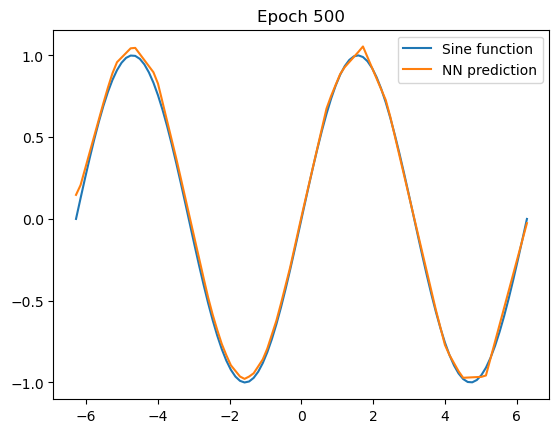

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from IPython.display import clear_output

# Define the loss function (mean squared error) and the optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model for 500 epochs
num_epochs = 500
for epoch in range(num_epochs):
    # Forward pass: pass the input through the model and calculate the loss
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train)

    # Backward pass and optimization: calculate gradients and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Plot the test set output during training every 10 epochs
    if (epoch+1) % 10 == 0:
        # Get the model predictions for the test set without calculating gradients
        with torch.no_grad():
            y_test_pred = model(torch.tensor(x_test, dtype=torch.float32).view(-1, 1)).detach().numpy().reshape(-1)
        # Clear the previous output in Jupyter Notebook
        clear_output(wait=True)
        # Print the current training loss
        print(f'Train Loss: {round(loss.item(), 4)}')
        # Print the current testing loss
        print(f'Test  Loss: {round(mean_squared_error(y_test, y_test_pred), 4)}')
        # Plot the test set output and model predictions
        plt.title(f'Epoch {epoch+1}')
        plt.plot(x_test, y_test, label='Sine function')
        plt.plot(x_test, y_test_pred, label='NN prediction')
        plt.legend()
        plt.show()
